S.Sai Kumar 
E22CSEU1052
B36

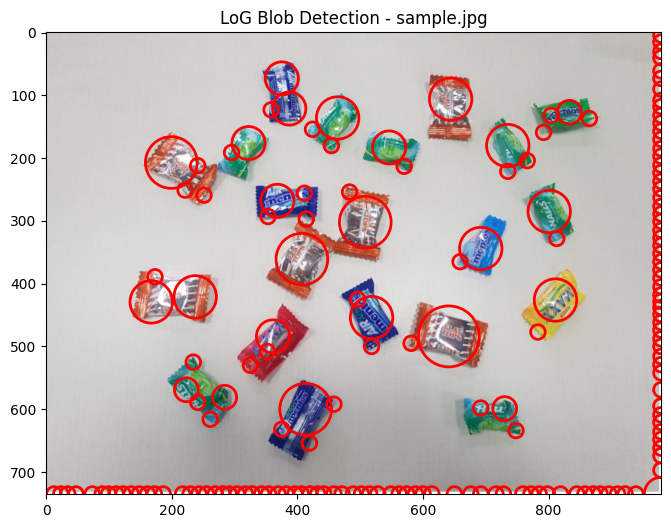

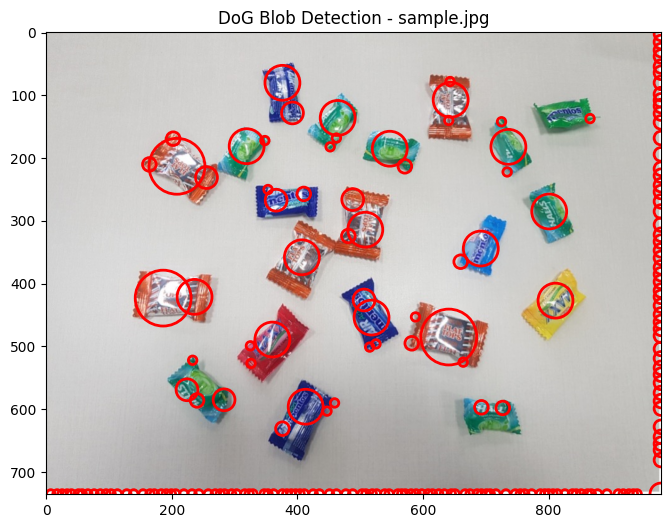

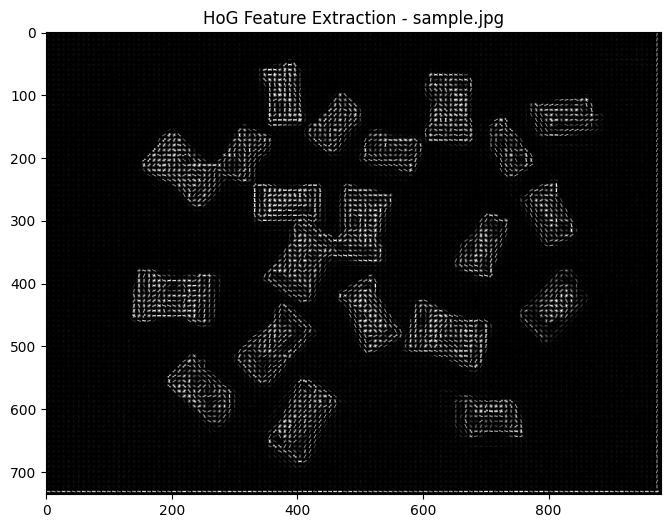

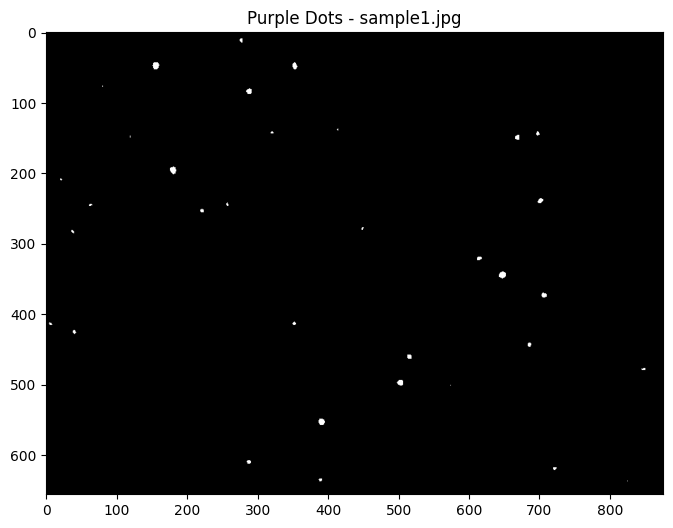

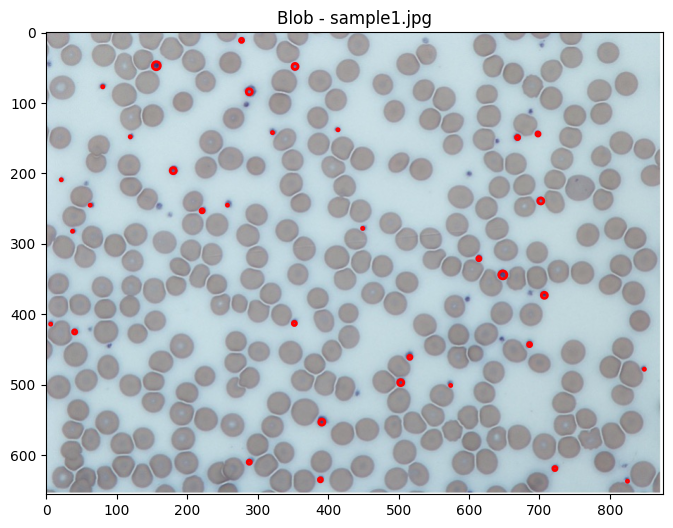

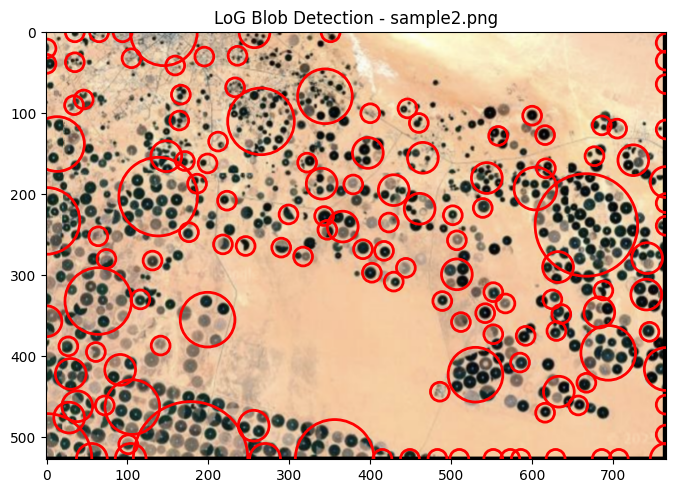

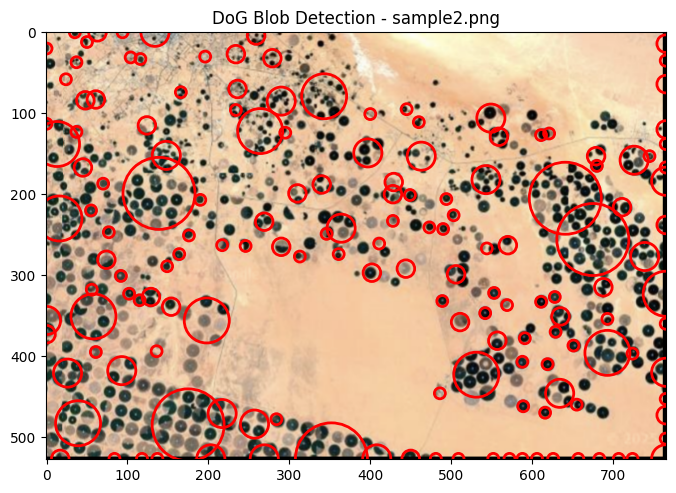

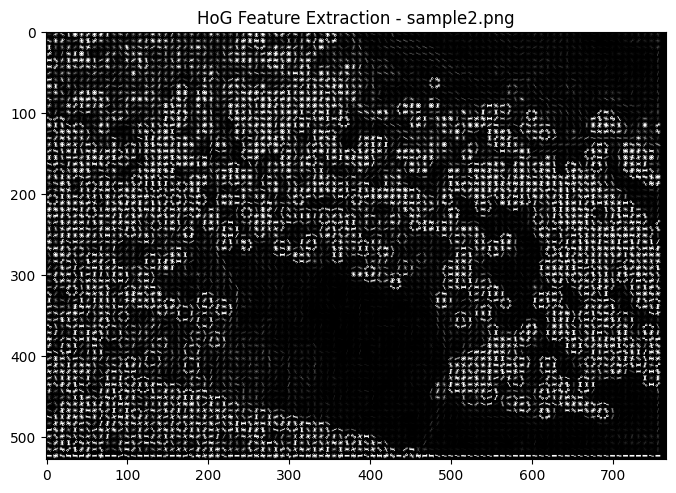

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, hog
from skimage import color, exposure

def load_image(image_path):
    image = cv2.imread(image_path)
    return image

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

def adaptive_color_texture_filter(image):
    gray = preprocess_image(image)
    edges = cv2.Canny(gray, 50, 150)
    return edges

def log_blob_detection(image):
    filtered = adaptive_color_texture_filter(image)
    blobs_log = blob_log(filtered, min_sigma=3, max_sigma=50, num_sigma=10, threshold=0.02)
    blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
    return blobs_log

def dog_blob_detection(image):
    filtered = adaptive_color_texture_filter(image)
    blobs_dog = blob_dog(filtered, min_sigma=3, max_sigma=50, threshold=0.02)
    blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)
    return blobs_dog

def detect_purple_dots(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_purple = np.array([120, 50, 50])
    upper_purple = np.array([160, 255, 255])
    mask = cv2.inRange(hsv, lower_purple, upper_purple)
    blobs_log = blob_log(mask, min_sigma=1, max_sigma=10, num_sigma=10, threshold=0.02)
    blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
    return blobs_log, mask

def hog_feature_extraction(image):
    gray = preprocess_image(image)
    fd, hog_image = hog(gray, orientations=12, pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2), visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return hog_image_rescaled

def display_results(image, blobs, title, min_radius=5, max_radius=80):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for blob in blobs:
        y, x, r = blob
        if min_radius < r < max_radius:
            c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
            ax.add_patch(c)
    ax.set_title(title)
    plt.show()

image_paths = ["sample.jpg", "sample1.jpg", "sample2.png"]

for image_path in image_paths:
    image = load_image(image_path)

    if "sample1.jpg" in image_path:  # Assuming sample1.jpg is the microscope image
        blobs_purple, mask = detect_purple_dots(image)
        plt.figure(figsize=(8,6))
        plt.imshow(mask, cmap='gray')
        plt.title(f"Purple Dots - {image_path}")
        plt.show()
        display_results(image, blobs_purple, f"Blob - {image_path}", min_radius=1, max_radius=8)

    else:
        blobs_log = log_blob_detection(image)
        display_results(image, blobs_log, f"LoG Blob Detection - {image_path}")

        blobs_dog = dog_blob_detection(image)
        display_results(image, blobs_dog, f"DoG Blob Detection - {image_path}")

        hog_image = hog_feature_extraction(image)
        plt.figure(figsize=(8,6))
        plt.imshow(hog_image, cmap='gray')
        plt.title(f"HoG Feature Extraction - {image_path}")
        plt.show()

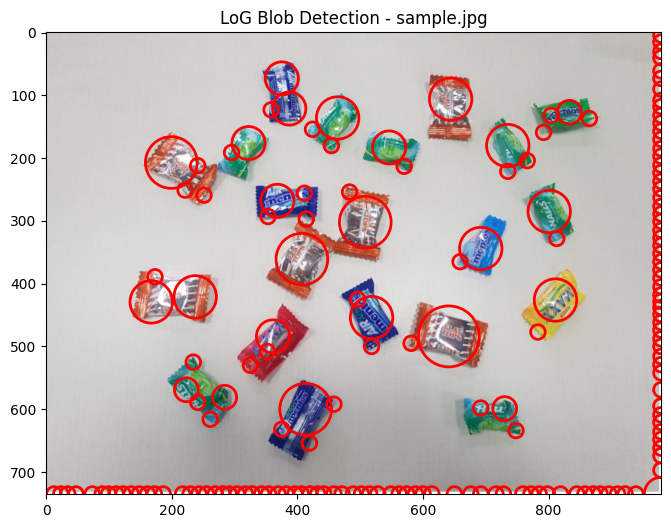

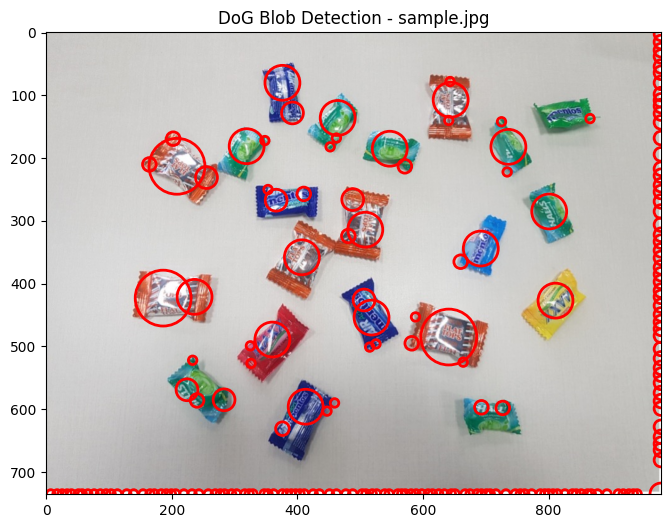

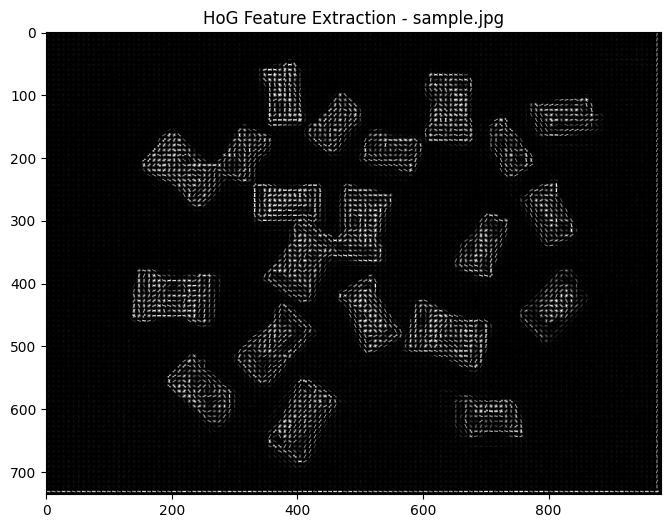

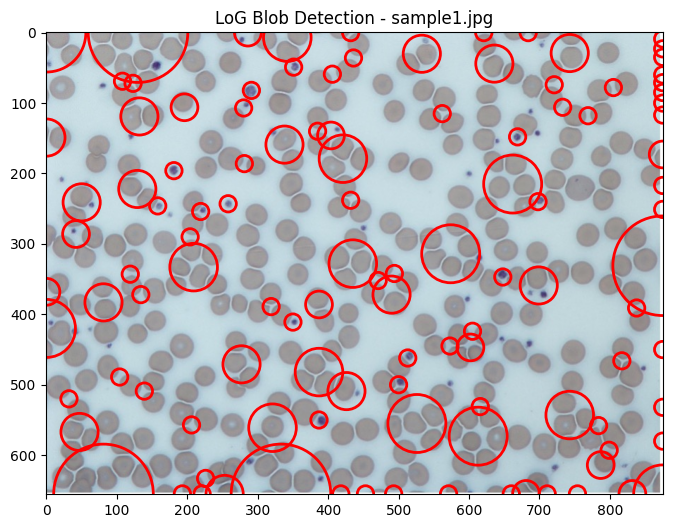

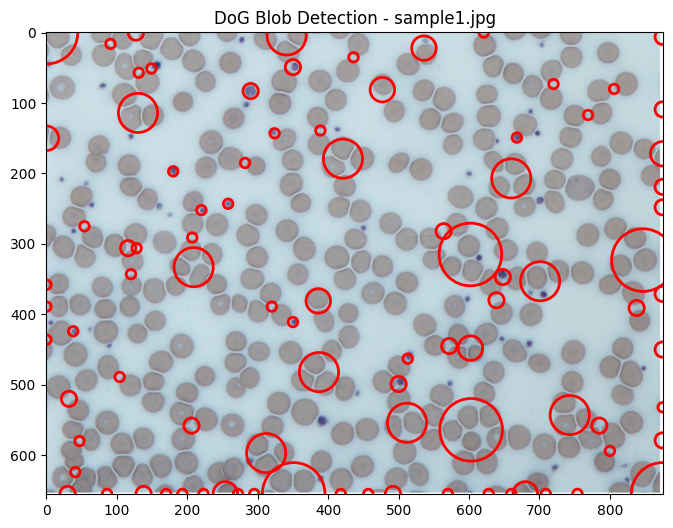

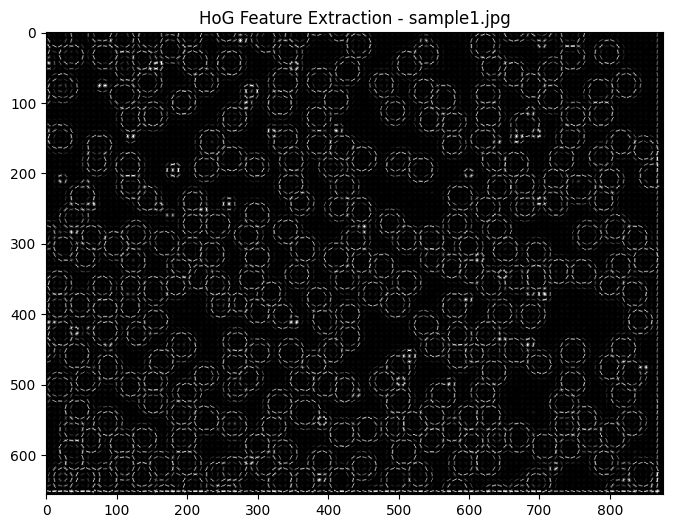

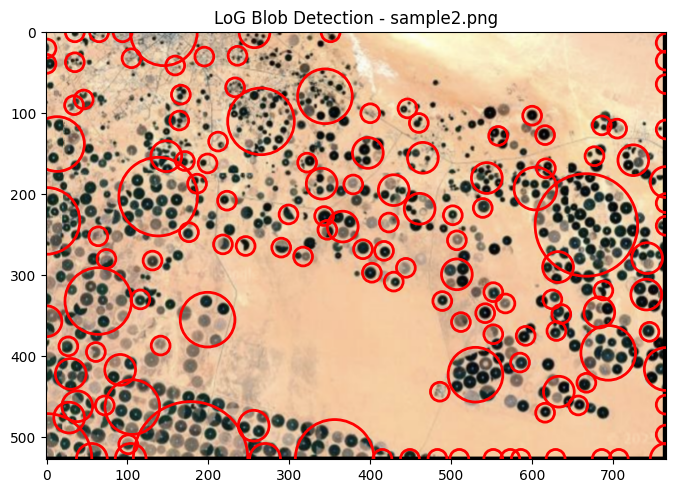

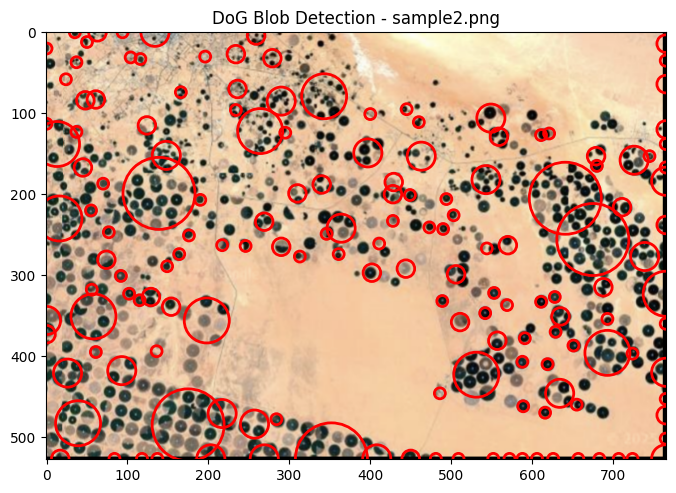

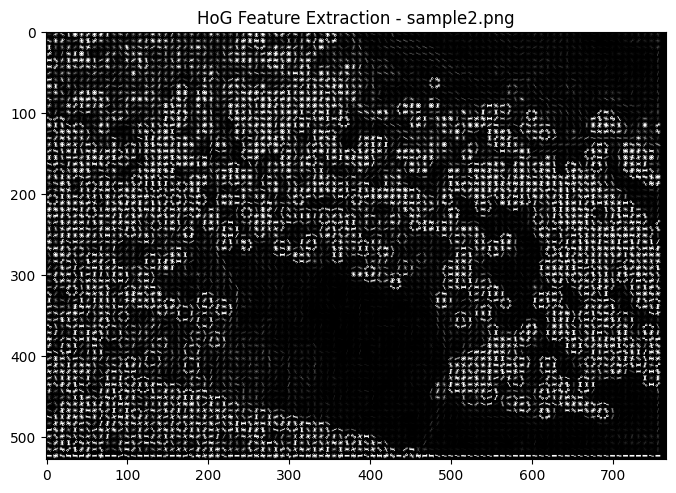

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, hog
from skimage import color, exposure

def load_image(image_path):
    image = cv2.imread(image_path)
    return image

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

def adaptive_color_texture_filter(image):
    gray = preprocess_image(image)
    edges = cv2.Canny(gray, 50, 150)
    return edges

def log_blob_detection(image):
    filtered = adaptive_color_texture_filter(image)
    blobs_log = blob_log(filtered, min_sigma=3, max_sigma=50, num_sigma=10, threshold=0.02)
    blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
    return blobs_log

def dog_blob_detection(image):
    filtered = adaptive_color_texture_filter(image)
    blobs_dog = blob_dog(filtered, min_sigma=3, max_sigma=50, threshold=0.02)
    blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)
    return blobs_dog

def detect_purple_dots(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_purple = np.array([120, 50, 50])
    upper_purple = np.array([160, 255, 255])
    mask = cv2.inRange(hsv, lower_purple, upper_purple)
    blobs_log = blob_log(mask, min_sigma=2, max_sigma=30, num_sigma=10, threshold=0.02)
    blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
    return blobs_log, mask

def hog_feature_extraction(image):
    gray = preprocess_image(image)
    fd, hog_image = hog(gray, orientations=12, pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2), visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return hog_image_rescaled

def display_results(image, blobs, title):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for blob in blobs:
        y, x, r = blob
        if 5 < r < 80:
            c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
            ax.add_patch(c)
    ax.set_title(title)
    plt.show()

image_paths = ["sample.jpg", "sample1.jpg", "sample2.png"]

for image_path in image_paths:
    image = load_image(image_path)

    if "microscope" in image_path:  # Assuming microscope image is uniquely named
        blobs_purple, mask = detect_purple_dots(image)
        plt.figure(figsize=(8,6))
        plt.imshow(mask, cmap='gray')
        plt.title(f"Purple Dot Mask - {image_path}")
        plt.show()
        display_results(image, blobs_purple, f"Purple Dot Detection - {image_path}")
    else:
        blobs_log = log_blob_detection(image)
        display_results(image, blobs_log, f"LoG Blob Detection - {image_path}")

        blobs_dog = dog_blob_detection(image)
        display_results(image, blobs_dog, f"DoG Blob Detection - {image_path}")

        hog_image = hog_feature_extraction(image)
        plt.figure(figsize=(8,6))
        plt.imshow(hog_image, cmap='gray')
        plt.title(f"HoG Feature Extraction - {image_path}")
        plt.show()

Training AlexNet...
Epoch 1, Loss: 0.4722
AlexNet Training Time: 153.47 seconds
Accuracy: 88.69%
Training VGG16...
Epoch 1, Loss: 0.5036
VGG16 Training Time: 1093.28 seconds
Accuracy: 87.86%


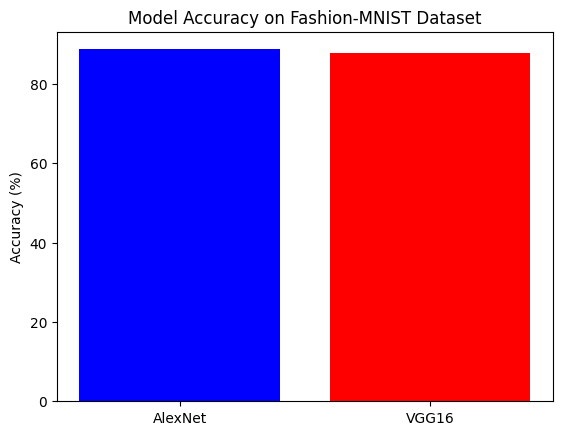

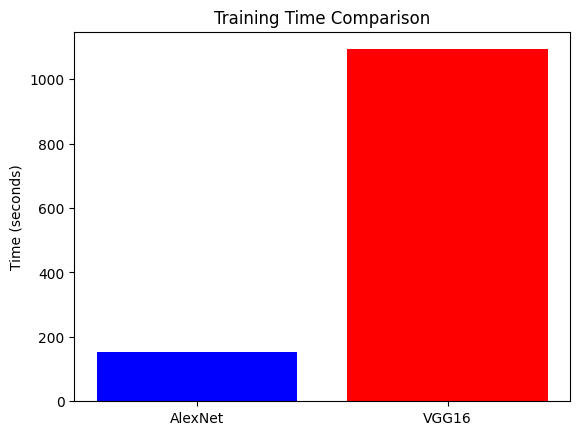

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST

# Task 2: Image Classification on Fashion-MNIST

def get_data_loaders(batch_size=128):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize for AlexNet and VGG16
        transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    trainset = FashionMNIST(root='./data', train=True, download=True, transform=transform)
    testset = FashionMNIST(root='./data', train=False, download=True, transform=transform)

    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

    return trainloader, testloader

# Load Pretrained AlexNet and modify for Fashion-MNIST
def get_alexnet():
    model = torchvision.models.alexnet(pretrained=True)
    model.classifier[6] = nn.Linear(4096, 10)  # Adjust for 10 classes
    return model

# Load Pretrained VGG16 and modify for Fashion-MNIST
def get_vgg16():
    model = torchvision.models.vgg16(pretrained=True)
    model.classifier[6] = nn.Linear(4096, 10)  # Adjust for 10 classes
    return model

# Training function
def train_model(model, trainloader, criterion, optimizer, epochs=1, device='cuda'):
    model.to(device)
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}')
    return model

# Evaluation function
def evaluate_model(model, testloader, device='cuda'):
    model.to(device)
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy

# Performance comparison
def compare_models():
    trainloader, testloader = get_data_loaders()

    models = {'AlexNet': get_alexnet(), 'VGG16': get_vgg16()}
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    criterion = nn.CrossEntropyLoss()

    results = {}
    for name, model in models.items():
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        print(f'Training {name}...')
        start_time = time.time()
        trained_model = train_model(model, trainloader, criterion, optimizer, epochs=1, device=device)
        elapsed_time = time.time() - start_time
        print(f'{name} Training Time: {elapsed_time:.2f} seconds')
        accuracy = evaluate_model(trained_model, testloader, device=device)
        results[name] = {'accuracy': accuracy, 'time': elapsed_time}

    # Plot results
    plt.bar(results.keys(), [res['accuracy'] for res in results.values()], color=['blue', 'red'])
    plt.ylabel('Accuracy (%)')
    plt.title('Model Accuracy on Fashion-MNIST Dataset')
    plt.show()

    plt.bar(results.keys(), [res['time'] for res in results.values()], color=['blue', 'red'])
    plt.ylabel('Time (seconds)')
    plt.title('Training Time Comparison')
    plt.show()

# Run model comparison
compare_models()
